# Making matplotlib plots look better

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

# Get some sample data

Let's get the same data we had in our basic cookbook using the cars data set.

In [2]:
df_cars = pd.read_csv("data/cars.csv")
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


In [3]:
# Get average miles per gallon for each car with the same number of cylinders
avg_mpg = df_cars.groupby('CYL').mean()['MPG']
avg_wgt = df_cars.groupby('CYL').mean()['WGT'] # do the same for average weight

# Get average miles per gallon for each car with the same weight
avg_mpg_per_wgt = df_cars.groupby('WGT').mean()['MPG']

# Get the unique list of cylinders in numerical order
cyl = sorted(df_cars['CYL'].unique())

# Get a list of all mpg values for three specific cylinder sizes
cyl4 = df_cars[df_cars['CYL']==4]['MPG'].values
cyl6 = df_cars[df_cars['CYL']==6]['MPG'].values
cyl8 = df_cars[df_cars['CYL']==8]['MPG'].values

## Text attributes

Text can have multiple useful attributes:

* position: the top of the graph is the title; axes are on the bottom and left (and possibly right)
* color: I use this sparingly but it's possible to make certain words pop out nicely
* size: the title should be bigger than the axes labels, for example.
* font: for mathematics, often italics make sense; Some people prefer times Roman over Helvetica
* angle: rarely used but one could make a graph using words that undulates up-and-down instead of a line plot; probably best to limit it to angling  categorical variable names on the X axis

### Font size

Most of the text-related functions allow you to specify the font size. For example, let's make a bigger version of a plot from our previous notebook and then change the font sizes to be a little bigger.

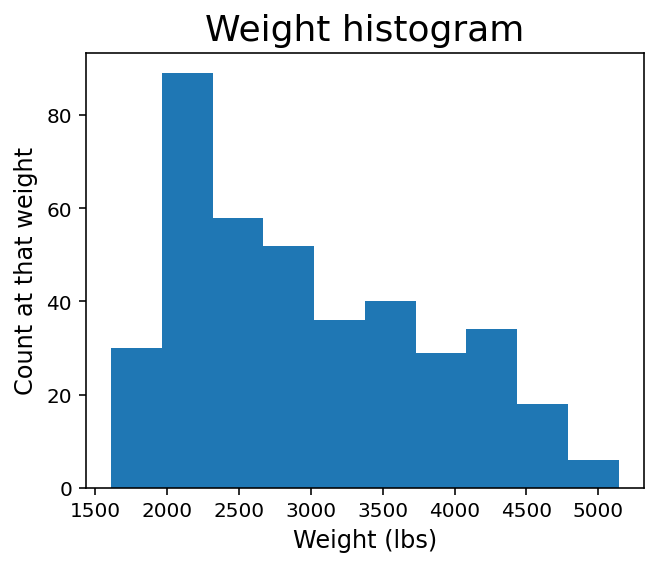

In [4]:
fig, ax = plt.subplots(figsize=(5,4))
ax.hist(df_cars['WGT'])
ax.set_xlabel("Weight (lbs)",         fontsize=12)
ax.set_ylabel("Count at that weight", fontsize=12)
ax.set_title("Weight histogram",      fontsize=18)
plt.show()

### Font

It's a good idea to use the same font  throughout your graph.  Here's how to change the font. Notice that the same font size in different fonts can be physically different size on the screen.

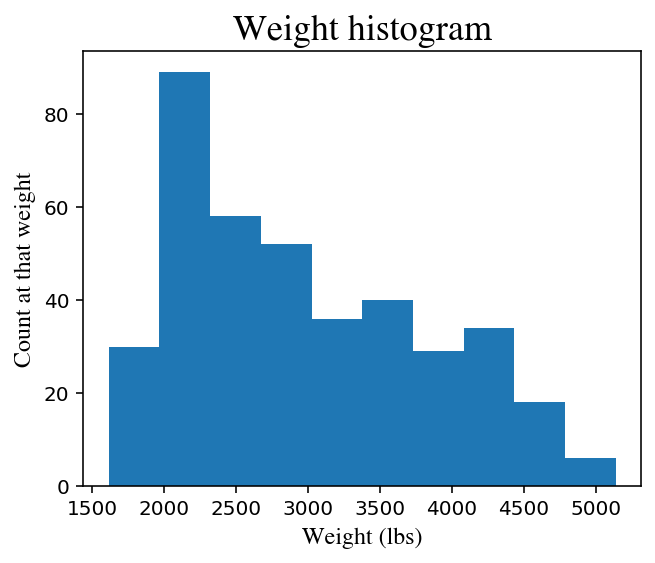

In [5]:
fig, ax = plt.subplots(figsize=(5,4)) 
ax.hist(df_cars['WGT'])
ax.set_xlabel("Weight (lbs)",         fontsize=12, fontname="Times")
ax.set_ylabel("Count at that weight", fontsize=12, fontname="Times")
ax.set_title("Weight histogram",      fontsize=18, fontname="Times")
plt.show()

You can also change the font size of the axis ticks. (Switching back to `Arial` font too)

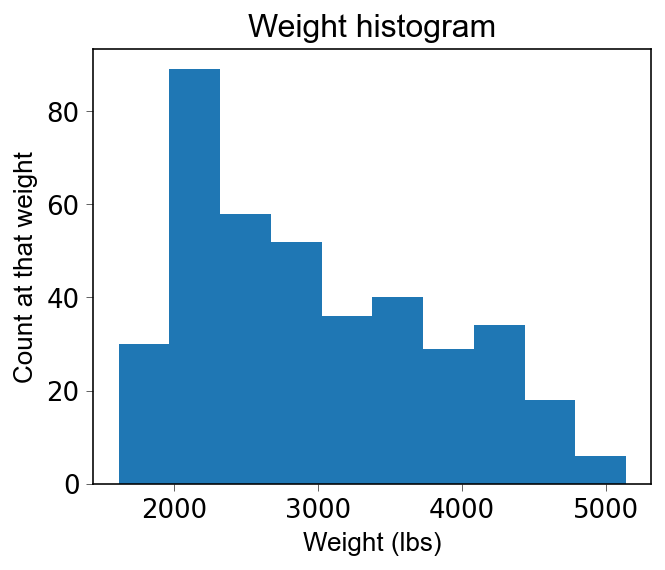

In [6]:
fig, ax = plt.subplots(figsize=(5,4))
ax.hist(df_cars['WGT'])
ax.set_xlabel("Weight (lbs)",         fontsize=13, fontname="Arial")
ax.set_ylabel("Count at that weight", fontsize=13, fontname="Arial")
ax.set_title("Weight histogram",      fontsize=16, fontname="Arial")

ax.tick_params(axis='both', which='major', width=.3, labelsize=13)

plt.show()

Note that the 200, 3000 etc... are bigger.

## Color

This is a huge topic, but we need to figure out how to set the color of various  graph items and then you can think about the design issues (i.e., which and how many colors to use).

Google "color picker" and you will see a million different websites that will help you pick RGB color values (6-digit hexadecimal numbers).

### Line color and label color

Let's start out by setting the color of a line plot. The default color is not bad, but let's choose a specific color, rather than letting the library choose the colors for us. In order to get more data to plot a second curve on the same scale, let's draw `avg_mpg` and `avg_wgt/100` using some of the standard colors:

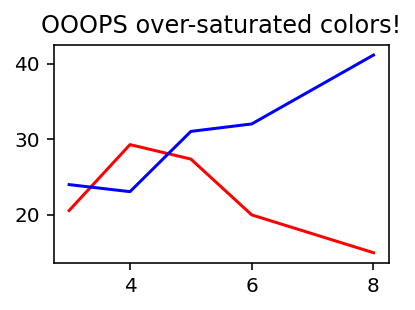

In [7]:
fig, ax = plt.subplots(figsize=(3,2))
ax.plot(cyl, avg_mpg,     c='red')
ax.plot(cyl, avg_wgt/100, c='blue')
ax.set_title("OOOPS over-saturated colors!")
plt.show()

Instead, let's choose some subtler colors.  I'm going to pick them using a drawing application (OmniGraffle) and then grab the six digit code for the colors:

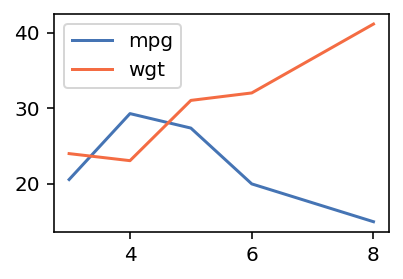

In [8]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure

ax.plot(cyl, avg_mpg,     c='#4574B4', label="mpg") # Those are 6-digit hexadecimal numbers for red-green-blue
ax.plot(cyl, avg_wgt/100, c='#F46C43', label="wgt")

plt.legend()
plt.show()

Notice that there is good contrast between the two colors and, at least to my eye, they are more pleasing and sophisticated looking.

To make a single line stand out, you can  give it a color but make the other is black or gray:

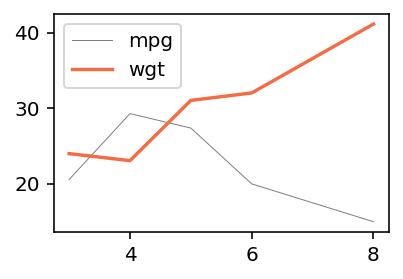

In [28]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure

ax.plot(cyl, avg_mpg,     c='grey',    lw=.5,  label="mpg") # set skinny line width too
ax.plot(cyl, avg_wgt/100, c='#F46C43', lw=1.7, label="wgt") # fatter line

plt.legend()
plt.show()

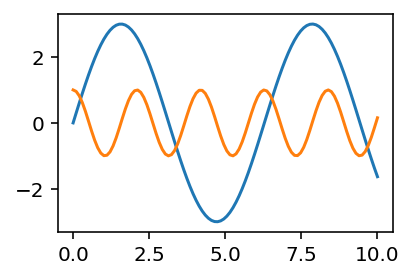

In [62]:
x = np.linspace(0,10,num=100)
y1 = 3*np.sin(x)
y2 = np.cos(3*x)
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure

ax.plot(x,y1)
ax.plot(x,y2)

###  Exercise 1

1. Given the following data, plot two curves and choose different colors for each
```
x = np.linspace(0,10,num=100)
y1 = 3*np.sin(x)
y2 = np.cos(3*x)
```
1. Label the X axis as "X" and Y axis as "Amplitude"

### Axis tick color

If it ever comes up, here's how you change the color of the tick labels themselves, though I'm not convinced it looks good.

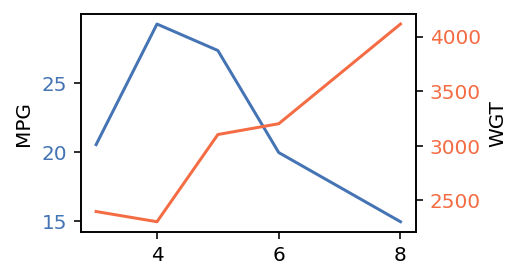

In [54]:
fig, ax = plt.subplots(figsize=(3,2))
ax_wgt = ax.twinx()

ax.plot(cyl, avg_mpg,     c='#4574B4', label="mpg")
ax_wgt.plot(cyl, avg_wgt, c='#F46C43', label="wgt")

ax.set_ylabel("MPG")
ax_wgt.set_ylabel("WGT")

for tick in ax.get_yticklabels():
    tick.set_color('#4574B4')
for tick in ax_wgt.get_yticklabels():
    tick.set_color('#F46C43')

plt.show()

### Scatterplot colors, dot size, transparency

There's lots we can change with scatterplots, including the dot size, color, and alpha channel (transparency).   Here's how to alter the attributes of the dots:

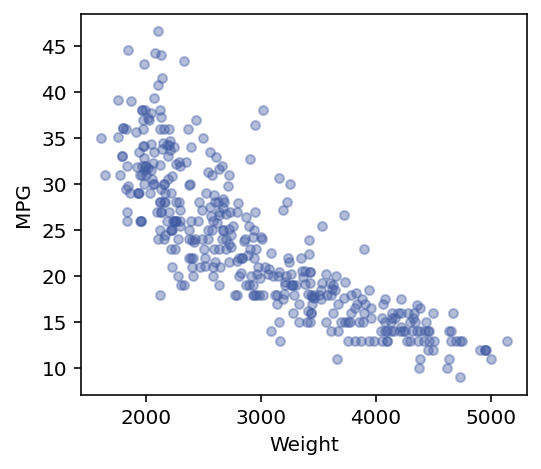

In [11]:
fig, ax = plt.subplots(figsize=(4,3.5))
ax.scatter(df_cars['WGT'], df_cars['MPG'], c='#415BA3', s=20, alpha=.4)
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")
plt.show()

Another cool thing we can do is set each.to be a different color, based upon its Y value:

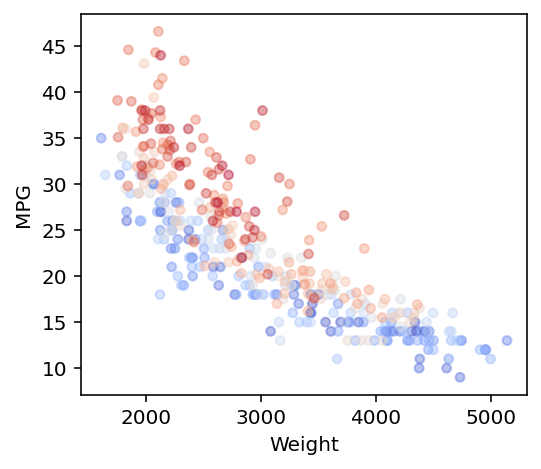

In [12]:
fig, ax = plt.subplots(figsize=(4,3.5))
# Get a value between 0 and 1 for each Y value as a color along a spectrum
crange = np.linspace(0,1,num=len(df_cars))

ax.scatter(df_cars['WGT'], df_cars['MPG'], c=crange, cmap='coolwarm', s=20, alpha=.4)
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")
plt.show()

There are lots of [color maps](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html) to choose from:

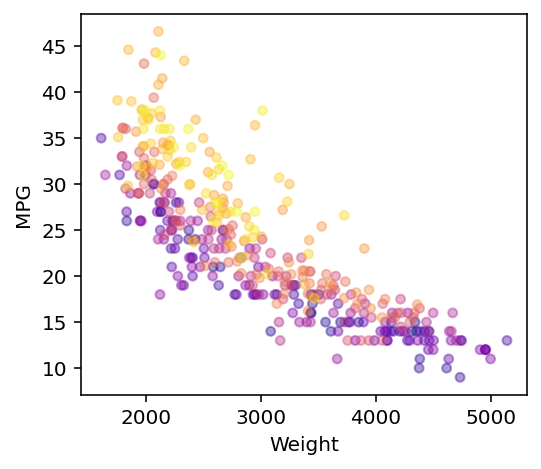

In [13]:
fig, ax = plt.subplots(figsize=(4,3.5))
# Get a value between 0 and 1 for each Y value as a color along a spectrum
crange = np.linspace(0,1,num=len(df_cars))
ax.scatter(df_cars['WGT'], df_cars['MPG'], c=crange, cmap='plasma', s=20, alpha=.4)
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")
plt.show()

### Histogram color and outlining

Personally I like lighter colors and I also like to separate the bars of the histogram with a very thin hairline around the rectangles.

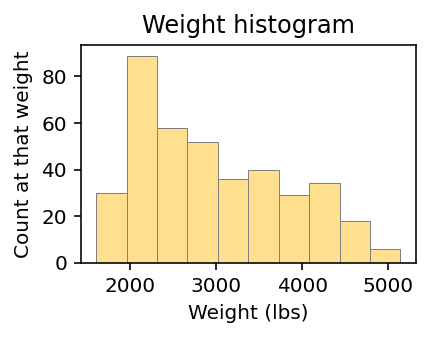

In [14]:
fig, ax = plt.subplots(figsize=(3,2))
n, bins, patches = ax.hist(df_cars['WGT'], color='#FEE08F')  # save the results of hist
ax.set_xlabel("Weight (lbs)")
ax.set_ylabel("Count at that weight")
ax.set_title("Weight histogram")

# iterate through the rectangles associated with each bar
for rect in patches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

plt.show()

If you need to make one of the rectangles stick out, you can select the appropriate bar  and set its color:

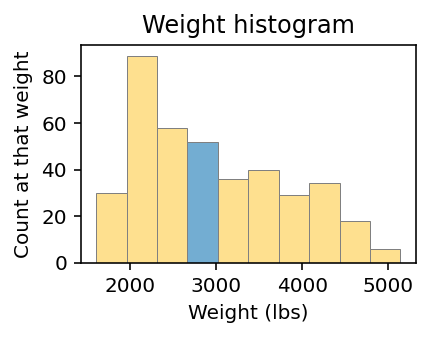

In [15]:
fig, ax = plt.subplots(figsize=(3,2))
n, bins, patches = ax.hist(df_cars['WGT'], color='#FEE08F')  # save the results of hist
ax.set_xlabel("Weight (lbs)")
ax.set_ylabel("Count at that weight")
ax.set_title("Weight histogram")

# iterate through the rectangles associated with each bar
for i,rect in enumerate(patches):
    if i==3:
        rect.set_color('#73ADD2')
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

plt.show()

## Line symbols, styles, markers

The third argument of the `plot()` function call is a string that represents color and style for the line and data points.  For example, `'.-'` says to place a dot at the data values and draw a line between them whereas `':'` says to just draw a dotted line:

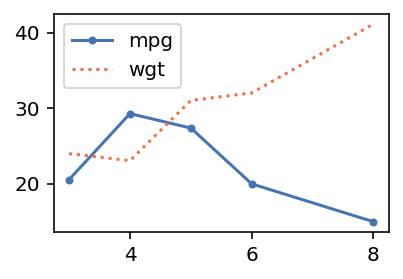

In [16]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure

ax.plot(cyl, avg_mpg,     '.-', c='#4574B4', label="mpg")
ax.plot(cyl, avg_wgt/100, ':',  c='#F46C43', label="wgt")

plt.legend()
plt.show()

There are [lots of markers](https://matplotlib.org/3.1.1/api/markers_api.html) to choose from, but you should be careful not to randomly stick in markers because they look cool. Here's an example with two different marker symbols and sizes:

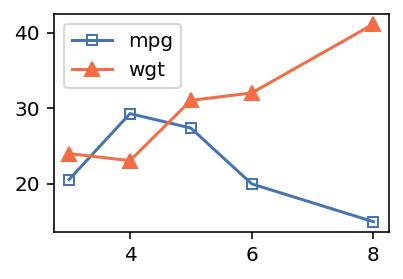

In [17]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure

ax.plot(cyl, avg_mpg,     's-', markersize=5, fillstyle='none', c='#4574B4', label="mpg")
ax.plot(cyl, avg_wgt/100, '^-', markersize=7,                   c='#F46C43', label="wgt")

plt.legend()
plt.show()

## Line width

Given how sharp our screens are these days, I prefer thinner lines than the default 1.0 thickness.

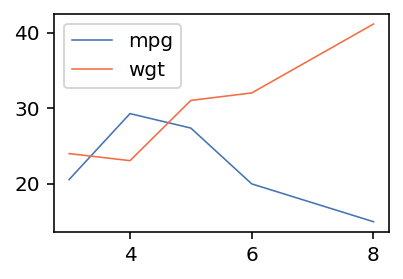

In [18]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure

ax.plot(cyl, avg_mpg,     lw=.8, c='#4574B4', label="mpg")
ax.plot(cyl, avg_wgt/100, lw=.8, c='#F46C43', label="wgt")

plt.legend()
plt.show()

## Removing extraneous lines

Oddly enough, one of the most important things is often to reduce clutter in your graph. For example, we absolutely do not need the upper and right box lines, so let's turn them off. Let's also make the axis lines very sharp airlines too.

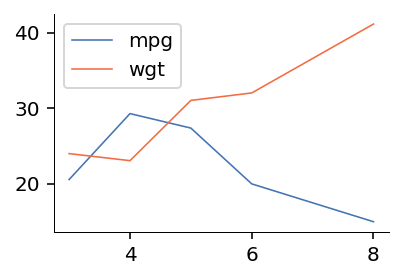

In [19]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure

ax.plot(cyl, avg_mpg,     lw=.8, c='#4574B4', label="mpg")
ax.plot(cyl, avg_wgt/100, lw=.8,  c='#F46C43', label="wgt")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

plt.legend()
plt.show()

##  Categorical X axis labels

When we have a categorical variable, even an ordinal, it makes sense sometimes to change the label on the ticks of the X axis. This way, we get the category name instead of a number. In our case, we can invent a categorical name `Cyl-n`. We need to make the graph a little wider so that the labels don't overlap:

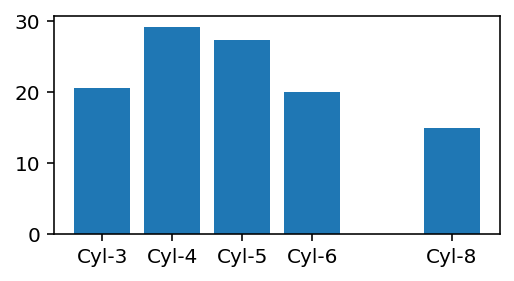

In [35]:
fig, ax = plt.subplots(figsize=(4,2))  # make one subplot (ax) on the figure
ax.bar(cyl, avg_mpg)
ax.set_xticks(cyl)                     # make sure we have a ticket for every cyl value
ax.set_xticklabels([f'Cyl-{n}' for n in cyl])
plt.show()

Sometimes the labels are so long that you need to rotate them:

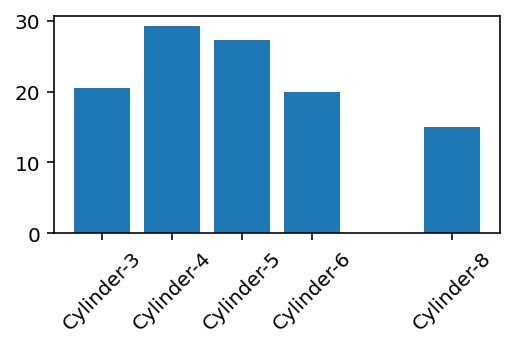

In [52]:
fig, ax = plt.subplots(figsize=(4,2))  # make one subplot (ax) on the figure
ax.bar(cyl, avg_mpg)
ax.set_xticks(cyl)                     # make sure we have a ticket for every cyl value
ax.set_xticklabels([f'Cylinder-{n}' for n in cyl], rotation=45)
plt.show()